In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")


data = data.dropna()


data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)


X = data.drop("target", axis=1)
y = data["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))  # Input layer
model.add(Dropout(0.1))  # Dropout for regularization
model.add(Dense(32, activation="relu"))  # Hidden layer
model.add(Dropout(0.1))  # Dropout for regularization
model.add(Dense(1, activation="sigmoid"))  # Output layer (binary classification)


model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


model.save("heart_disease_model.h5")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 518ms/step - accuracy: 0.6317 - loss: 0.6570 - val_accuracy: 0.6458 - val_loss: 0.6624
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7241 - loss: 0.5950 - val_accuracy: 0.7083 - val_loss: 0.6138
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7708 - loss: 0.5378 - val_accuracy: 0.7500 - val_loss: 0.5741
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7983 - loss: 0.4980 - val_accuracy: 0.7708 - val_loss: 0.5424
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7388 - loss: 0.4985 - val_accuracy: 0.7708 - val_loss: 0.5174
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8047 - loss: 0.4601 - val_accuracy: 0.7917 - val_loss: 0.5022
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8131 - loss: 0.4448 - val_accuracy: 0.7917 - val_loss: 0.4886
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8464 - loss: 0.4026 - val_accuracy: 0.7917 - val_loss: 0.4755
Epoch 9/50

Accuracy: 0.8500
Precision: 0.8000
Recall: 0.8333
F1-Score: 0.8163
ROC-AUC: 0.8472


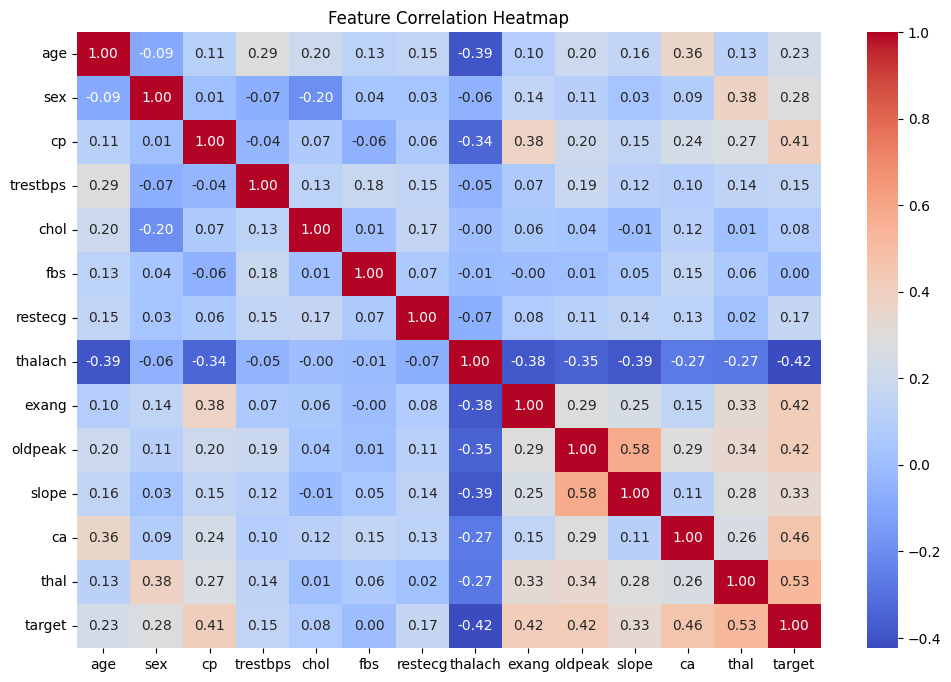

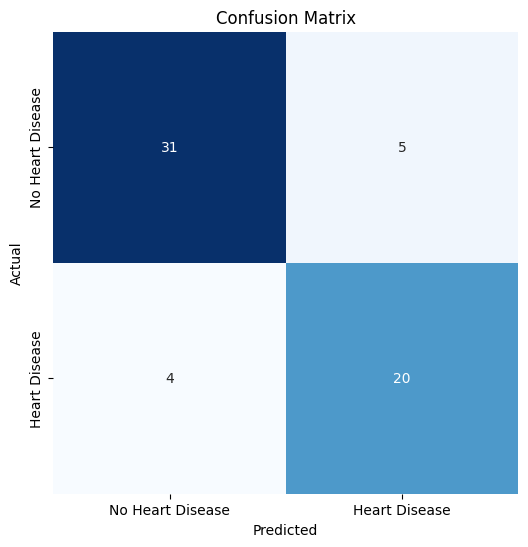

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


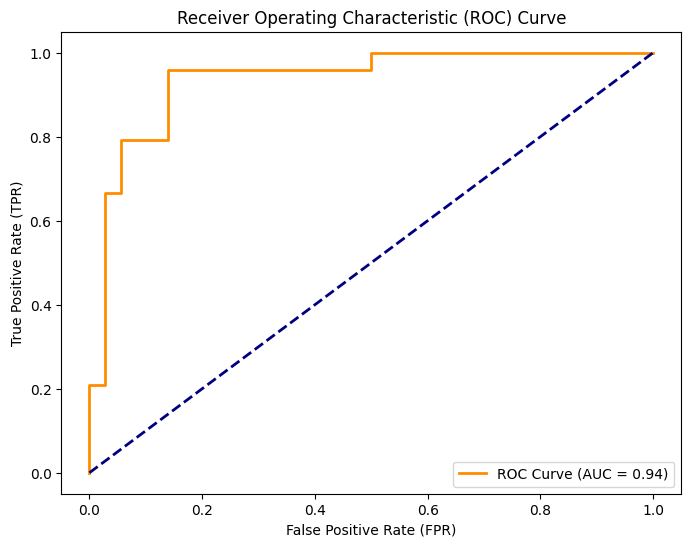

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


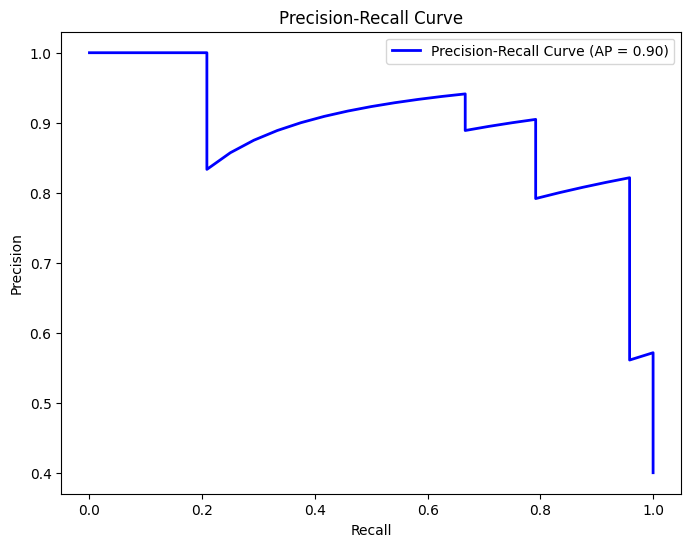

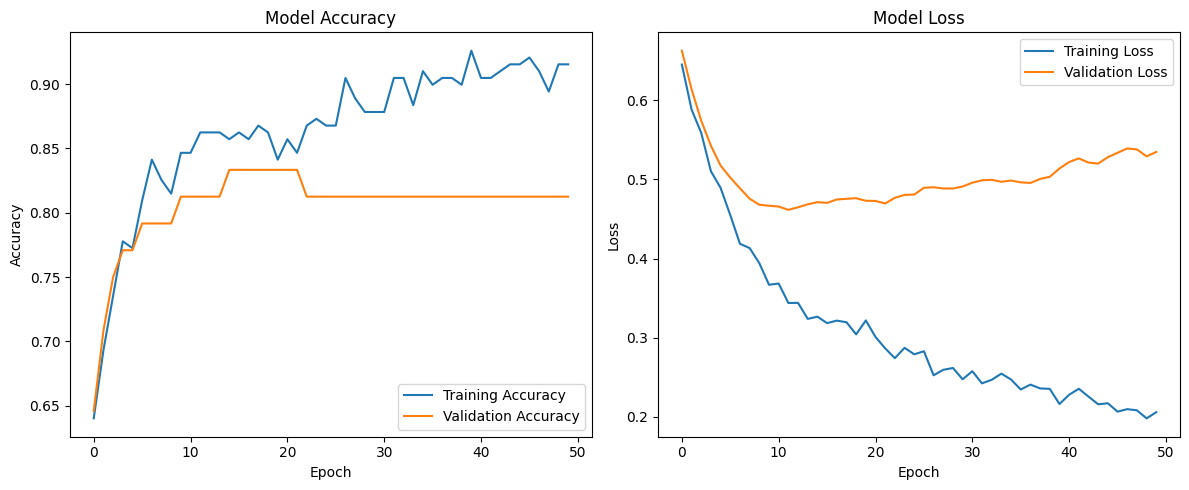

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test))
average_precision = average_precision_score(y_test, model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (if any)
data = data.dropna()

# Convert target to binary classification (0 = no heart disease, 1 = heart disease)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==================================================
# Improved Model Architecture
# ==================================================

def create_model(optimizer='adam', dropout_rate=0.3, neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model = KerasClassifier(build_fn=create_model, verbose=0)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'neurons': [64, 128, 256]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_result.best_params_)

# Train the final model with the best parameters
best_model = create_model(
    optimizer=grid_result.best_params_['optimizer'],
    dropout_rate=grid_result.best_params_['dropout_rate'],
    neurons=grid_result.best_params_['neurons']
)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================================================
# Visualizations
# ==================================================

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

In [ ]:
!pip install scikeras
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Use scikeras instead of tensorflow.keras.wrappers.scikit_learn
from scikeras.wrappers import KerasClassifier

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (if any)
data = data.dropna()

# Convert target to binary classification (0 = no heart disease, 1 = heart disease)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==================================================
# Improved Model Architecture
# ==================================================

def create_model(optimizer='adam', dropout_rate=0.3, neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
"""
# Create the model using scikeras
model = KerasClassifier(model=create_model, verbose=0)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'neurons': [64, 128, 256]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_result.best_params_)
"""
# Define KerasClassifier properly
model = KerasClassifier(model=create_model, verbose=0, optimizer='adam', dropout_rate=0.3, neurons=128)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],  # Use "model__" prefix
    'model__dropout_rate': [0.2, 0.3, 0.4],
    'model__neurons': [64, 128, 256]
}

#grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_result.best_params_)

# Train the final model with the best parameters
best_model = create_model(
    optimizer=grid_result.best_params_['optimizer'],
    dropout_rate=grid_result.best_params_['dropout_rate'],
    neurons=grid_result.best_params_['neurons']
)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================================================
# Visualizations
# ==================================================

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Use scikeras instead of tensorflow.keras.wrappers.scikit_learn
from scikeras.wrappers import KerasClassifier

# Define a custom KerasClassifier with __sklearn_tags__
class CustomKerasClassifier(KerasClassifier):
    def __getstate__(self):
        return self.__dict__

    def __setstate__(self, state):
        self.__dict__.update(state)

    @property
    def __sklearn_tags__(self):
        return {
            "non_deterministic": True,
            "requires_fit": True,
            "requires_y": True,
            "X_types": ["2darray"],
            "multioutput": False,
            "allow_nan": False,
            "stateless": False,
            "multilabel": False,
            "pairwise": False,
        }

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (if any)
data = data.dropna()

# Convert target to binary classification (0 = no heart disease, 1 = heart disease)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==================================================
# Improved Model Architecture
# ==================================================

def create_model(optimizer='adam', dropout_rate=0.3, neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the custom KerasClassifier
model = CustomKerasClassifier(model=create_model, verbose=0)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'neurons': [64, 128, 256]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_result.best_params_)

# Train the final model with the best parameters
best_model = create_model(
    optimizer=grid_result.best_params_['optimizer'],
    dropout_rate=grid_result.best_params_['dropout_rate'],
    neurons=grid_result.best_params_['neurons']
)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================================================
# Visualizations
# ==================================================

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Import Keras Tuner
import keras_tuner as kt

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (if any)
data = data.dropna()

# Convert target to binary classification (0 = no heart disease, 1 = heart disease)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==================================================
# Hyperparameter Tuning with Keras Tuner
# ==================================================

def build_model(hp):
    model = Sequential()

    # Tune the number of neurons in the first layer
    hp_neurons = hp.Int('neurons', min_value=32, max_value=256, step=32)
    model.add(Dense(hp_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'neurons_{i}', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner',
    project_name='heart_disease'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Neurons: {best_hps.get('neurons')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Number of Layers: {best_hps.get('num_layers')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================================================
# Visualizations
# ==================================================

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

Trial 86 Complete [00h 00m 13s]
val_accuracy: 0.8199999928474426

Best val_accuracy So Far: 0.8600000143051147
Total elapsed time: 00h 12m 56s

Search: Running Trial #87

Value             |Best Value So Far |Hyperparameter
96                |96                |neurons
0.2               |0.3               |dropout_rate
1                 |3                 |num_layers
64                |128               |neurons_0
0.2               |0.3               |dropout_rate_0
0.0001            |0.01              |learning_rate
96                |64                |neurons_1
0.2               |0.2               |dropout_rate_1
32                |128               |neurons_2
0.3               |0.3               |dropout_rate_2
50                |17                |tuner/epochs
0                 |6                 |tuner/initial_epoch
0                 |3                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 297ms/step - accuracy: 0

KeyboardInterrupt: 

In [ ]:
!pip install keras-tuner
!pip install --upgrade keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.6 MB/s eta 0:00:00


Trial 90 Complete [00h 00m 15s]
val_accuracy: 0.7599999904632568

Best val_accuracy So Far: 0.8600000143051147
Total elapsed time: 00h 28m 26s

Best Hyperparameters:
- Neurons: 192
- Dropout Rate: 0.30000000000000004
- Number of Layers: 2
- Learning Rate: 0.01

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 376ms/step - accuracy: 0.6132 - loss: 0.6433 - val_accuracy: 0.7600 - val_loss: 0.5297 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7448 - loss: 0.4977 - val_accuracy: 0.7800 - val_loss: 0.5034 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8318 - loss: 0.3693 - val_accuracy: 0.7600 - val_loss: 0.4432 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8313 - loss: 0.3193 - val_accuracy: 0.7800 - val_loss: 0.4389 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8741 - loss: 0.3177 - val_accuracy: 0.7600 - val_loss: 0.4491 - learning_

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
Accuracy: 0.9000
Precision: 0.9500
Recall: 0.7917
F1-Score: 0.8636
ROC-AUC: 0.8819


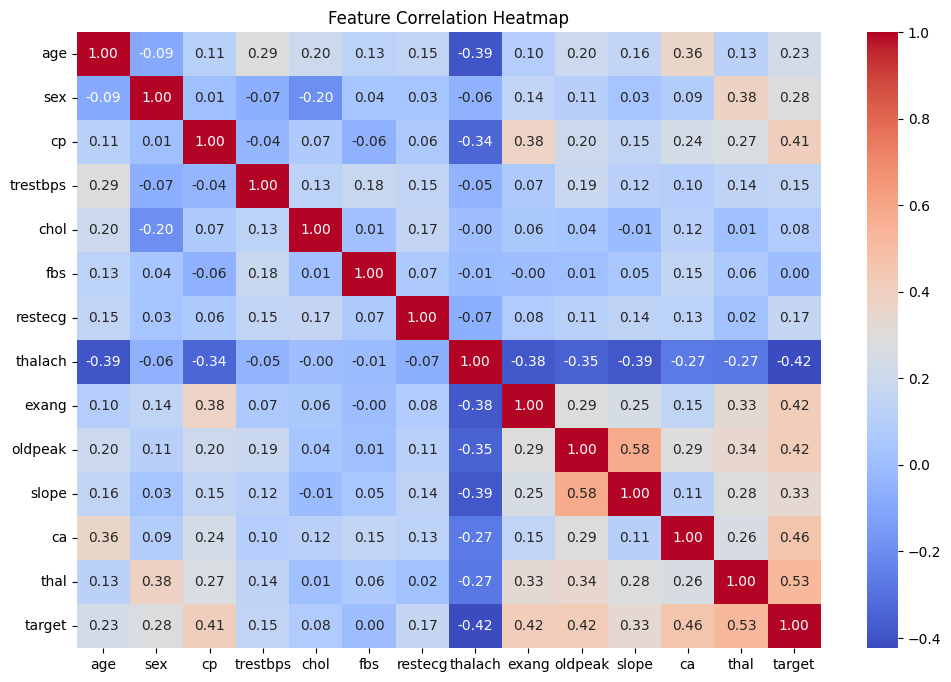

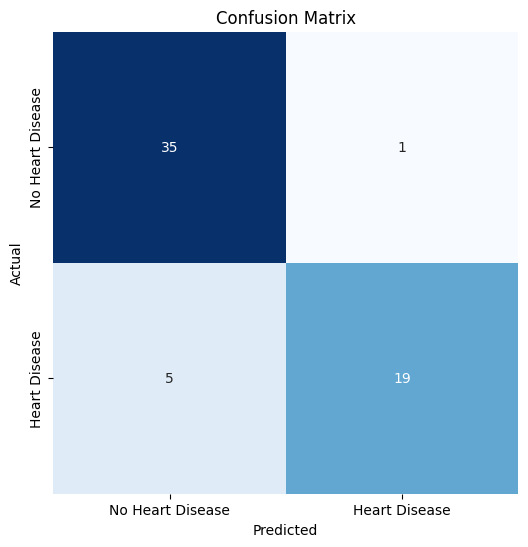

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


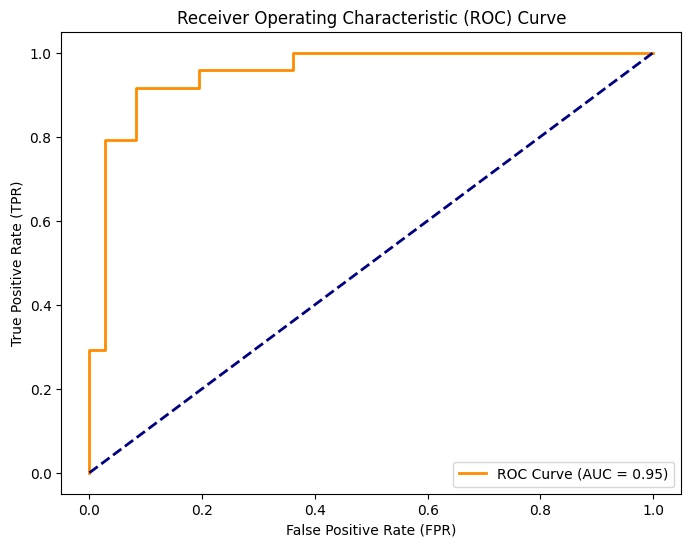

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


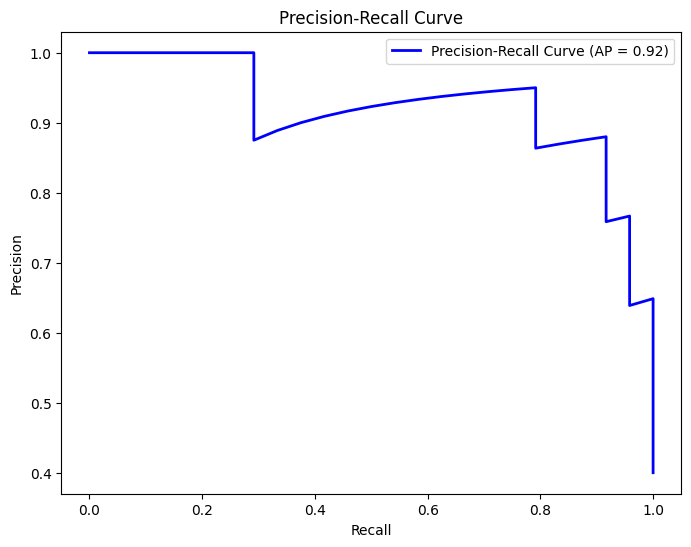

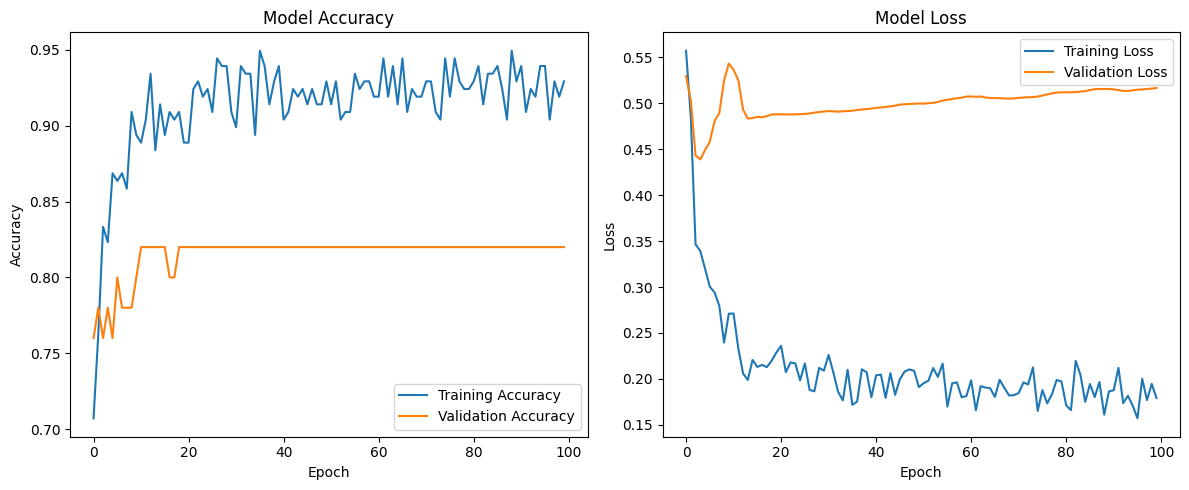

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Import Keras Tuner
import keras_tuner as kt

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (if any)
data = data.dropna()

# Convert target to binary classification (0 = no heart disease, 1 = heart disease)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==================================================
# Hyperparameter Tuning with Keras Tuner
# ==================================================

def build_model(hp):
    model = Sequential()

    # Tune the number of neurons in the first layer
    hp_neurons = hp.Int('neurons', min_value=32, max_value=256, step=32)
    model.add(Dense(hp_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'neurons_{i}', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Custom callback to stop after N trials
from tensorflow.keras.callbacks import Callback
#from keras_tuner import TunerCallback
#from keras_tuner.engine.tuner import TunerCallback

class StopAfterNTrials(Callback):
    def __init__(self, max_trials):
        super().__init__()
        self.max_trials = max_trials
        self.trial_count = 0

    def on_trial_end(self, trial):
        self.trial_count += 1
        if self.trial_count >= self.max_trials:
            self.model.stop_training = True  # Stop the search

# Initialize the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner',
    project_name='heart_disease'
)

# Perform hyperparameter search with the custom callback
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[StopAfterNTrials(max_trials=50)]  # Stop after 50 trials
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Neurons: {best_hps.get('neurons')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Number of Layers: {best_hps.get('num_layers')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================================================
# Visualizations
# ==================================================

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

Trial 90 Complete [00h 00m 13s]
val_accuracy: 0.7799999713897705

Best val_accuracy So Far: 0.8799999952316284
Total elapsed time: 00h 08m 11s

Best Hyperparameters:
- Neurons: 96
- Dropout Rate: 0.2
- Number of Layers: 3
- Learning Rate: 0.01

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6271 - loss: 0.6230 - val_accuracy: 0.7600 - val_loss: 0.4973 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7917 - loss: 0.4739 - val_accuracy: 0.7800 - val_loss: 0.4435 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8170 - loss: 0.4498 - val_accuracy: 0.7600 - val_loss: 0.4273 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8706 - loss: 0.3906 - val_accuracy: 0.7600 - val_loss: 0.4278 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8895 - loss: 0.3462 - val_accuracy: 0.8200 - val_loss: 0.4321 - learning_rate: 0.0100
Epoch

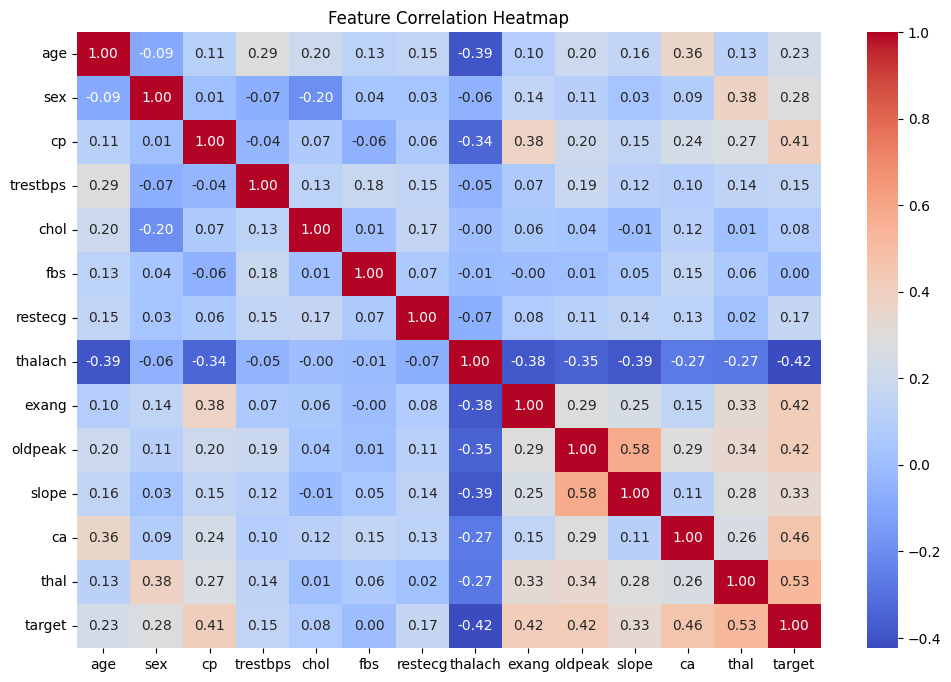

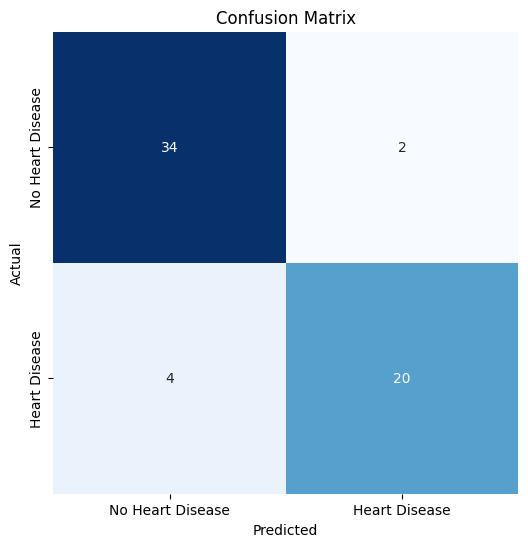

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


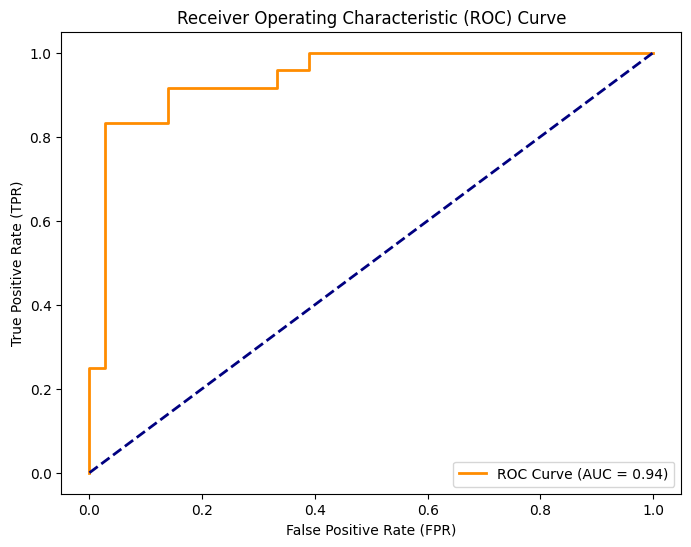

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


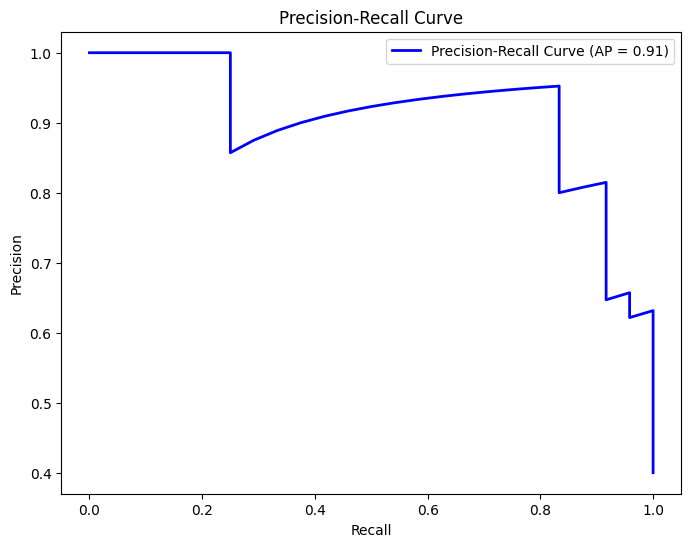

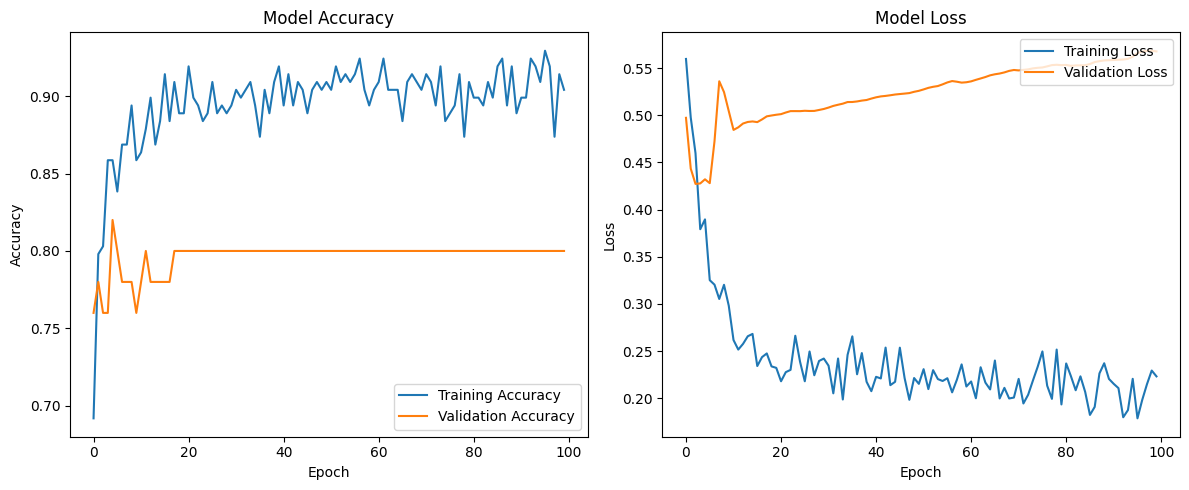

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, Callback
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Import Keras Tuner
import keras_tuner as kt

# Load the UCI Heart Disease dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]
data = pd.read_csv(url, names=column_names, na_values="?")

# Handle missing values (if any)
data = data.dropna()

# Convert target to binary classification (0 = no heart disease, 1 = heart disease)
data["target"] = data["target"].apply(lambda x: 1 if x > 0 else 0)

# Split data into features (X) and target (y)
X = data.drop("target", axis=1)
y = data["target"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ==================================================
# Hyperparameter Tuning with Keras Tuner
# ==================================================

def build_model(hp):
    model = Sequential()

    # Tune the number of neurons in the first layer
    hp_neurons = hp.Int('neurons', min_value=32, max_value=256, step=32)
    model.add(Dense(hp_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    # Tune the number of hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(hp.Int(f'neurons_{i}', min_value=32, max_value=128, step=32), activation='relu'))
        model.add(Dropout(hp.Float(f'dropout_rate_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    # Tune the learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Custom callback to stop after N trials
class StopAfterNTrials(Callback):
    def __init__(self, max_trials):
        super().__init__()
        self.max_trials = max_trials
        self.trial_count = 0

    def on_epoch_end(self, epoch, logs=None):
        self.trial_count += 1
        if self.trial_count >= self.max_trials:
            self.model.stop_training = True  # Stop the search

# Initialize the Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=50,
    factor=3,
    directory='keras_tuner',
    project_name='heart_disease'
)

# Perform hyperparameter search with the custom callback
tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1,
    callbacks=[StopAfterNTrials(max_trials=50)]  # Stop after 50 trials
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best Hyperparameters:
- Neurons: {best_hps.get('neurons')}
- Dropout Rate: {best_hps.get('dropout_rate')}
- Number of Layers: {best_hps.get('num_layers')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Learning rate scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = best_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[reduce_lr],
    verbose=1
)

# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# ==================================================
# Visualizations
# ==================================================

# 1. Heatmap for Data Correlation
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Heart Disease", "Heart Disease"],
            yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_model.predict(X_test))
average_precision = average_precision_score(y_test, best_model.predict(X_test))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="blue", lw=2, label=f"Precision-Recall Curve (AP = {average_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="upper right")
plt.show()

# 5. Training History Plot (Accuracy and Loss)
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()